#**Лабораторная работа по ММАД №1**

##**Выполнил: Степанищев Степан Владимирович, гр. 23171**



##***Задание 1***

###Подключаем библиотеки

---



In [53]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

###Загружаем iris как pandas.DataFrame и добавляем столбец с названием вида

---



In [65]:
iris_dataset = load_iris(as_frame=True)
iris_df = iris_dataset.data

named_iris_df=iris_df.copy()
named_iris_df['target']=iris_dataset.target
named_iris_df['target']=named_iris_df['target'].apply(lambda i: iris_dataset.target_names[i])
named_iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###Выводим корреляции по всей таблице

---



In [ ]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Делаем вывод, что petal width и petal length коррелируют друг с другом сильнее остальных переменных. Так же достаточно сильно линейно связаны sepal length и petal width. Напротив, sepal width и sepal length имеют малую корреляцию, это может говорить о том, что эти признаки скорее всего не связаны линейной зависимостью.

###Оценим корелляции по классам

---

####**Setosa**

In [ ]:
named_iris_df[named_iris_df['target'] == 'setosa'].drop(columns='target').corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


Тут уже интересно: получается, если рассмотреть ирисы Фишера (setosa) отдельно, то у них больше всего коррелируют sepal length и sepal width. Заметное отличие от результатов по всем классам.

####**Versicolor**

In [ ]:
named_iris_df[named_iris_df['target'] == 'versicolor'].drop(columns='target').corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


У разноцветных ирисов (versicolor) в целом все признаки неплохо коррелируют друг с другом.

####**Virginica**

In [ ]:
named_iris_df[named_iris_df['target'] == 'virginica'].drop(columns='target').corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


Тут сильнее всего связаны sepal length и petal length.

**Вывод:** Корреляции между признаками внутри классов существенно
отличаются от корреляцией по всем классам. В целом, это довольно ожидаемый результат: если бы корреляции не отличались, то мы могли бы предположить, что классы слабо различимы между собой.

###Немного порисуем

---



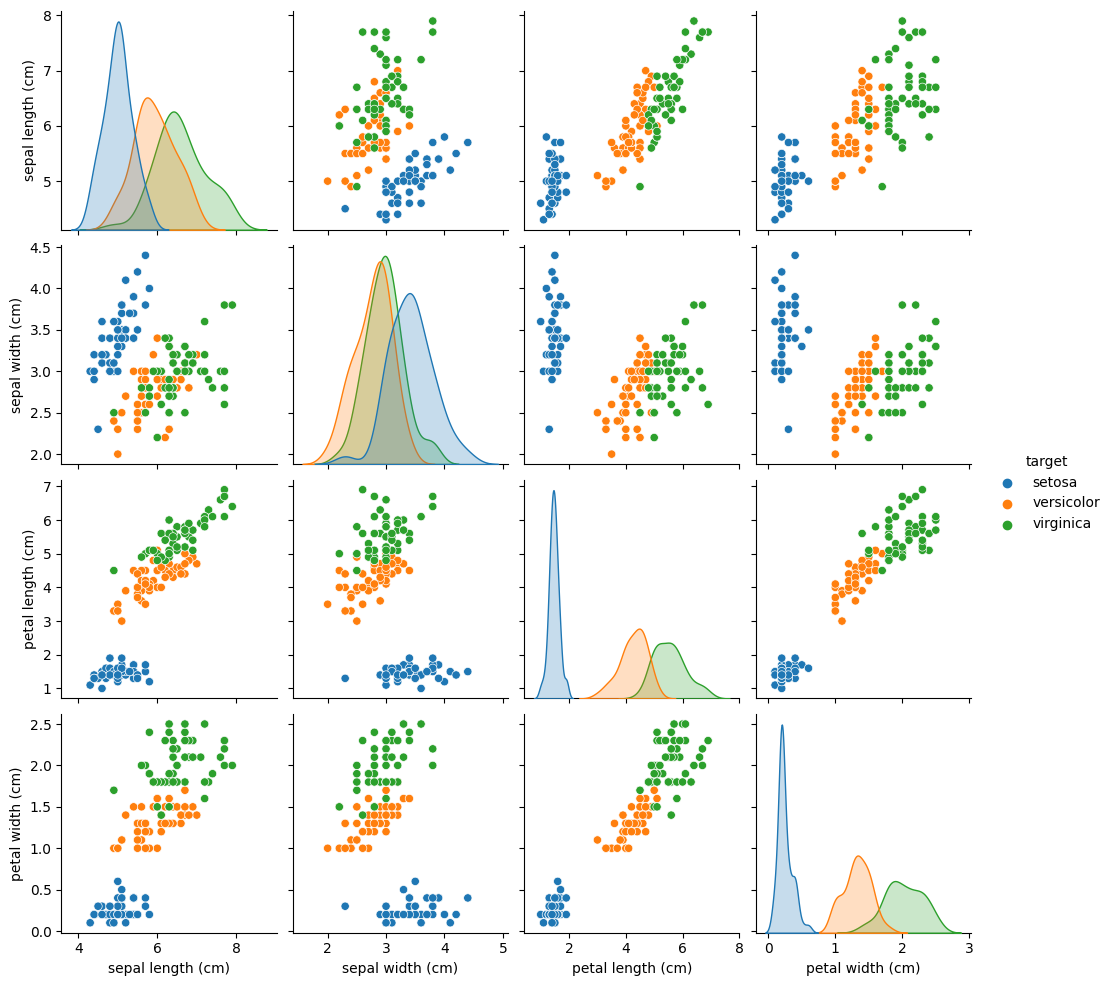

In [ ]:
sns.pairplot(named_iris_df, hue='target')
plt.show()


Видно, что setosa хорошо линейно отделим от других классов почти по всем парам признаков. То есть мы всегда сможем хорошо его классифицировать.

##***Задание 2***

Номер моей зачётки 220406, поэтому для этого пункта берем переменные sepal length и sepal width

Заводим функцию, которая будет визуализировать решение по методу.

In [248]:
def visualize_method(classifier, X, y, m_name):
  boundary = DecisionBoundaryDisplay.from_estimator(classifier, X,
                                                response_method="predict",
                                                grid_resolution=1000,
                                                alpha=0.5,
                                                xlabel='sepal length',
                                                ylabel='sepal width')
  boundary.ax_.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
  plt.title(m_name + ', bas=' + str(balanced_accuracy_score(y, classifier.predict(X))))



Остается только загрузить данные в виде (data, target) и убрать лишние столбцы.

In [250]:
X, y = load_iris(return_X_y=True)
X=X[:,[0,1]]


**Линейный дискриминант:**

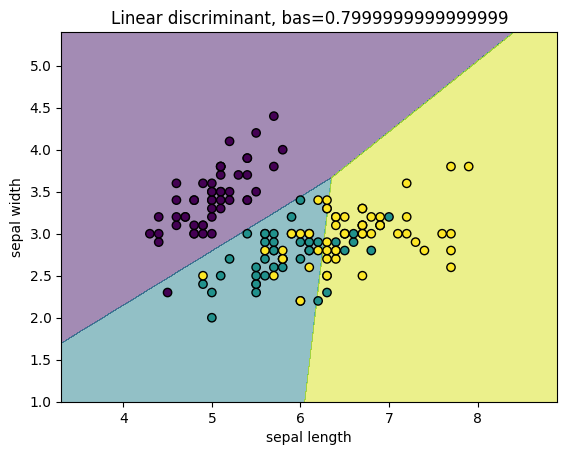

In [251]:
visualize_method(LinearDiscriminantAnalysis().fit(X, y), X, y, 'Linear discriminant')

**Квадратичный дискриминант:**

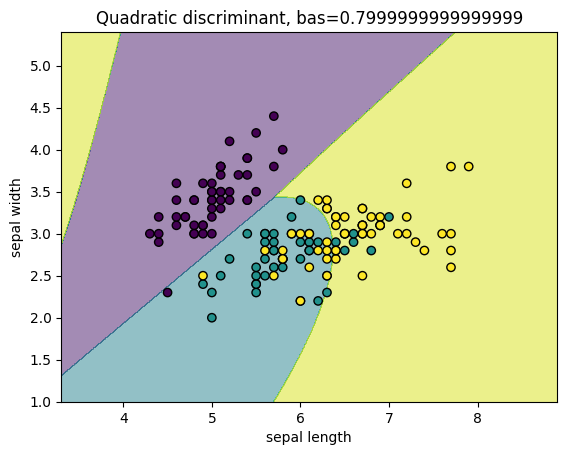

In [59]:
visualize_method(QuadraticDiscriminantAnalysis().fit(X, y), X, y, 'Quadratic discriminant')

**Логистическая регрессия:**

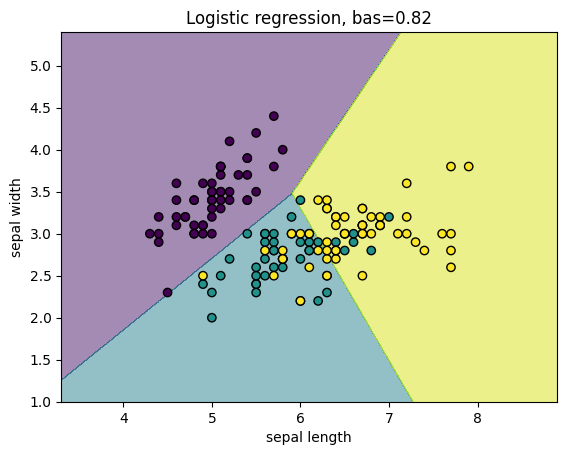

In [60]:
visualize_method(LogisticRegression().fit(X, y), X, y, 'Logistic regression')

**SVM (Линейное ядро):**

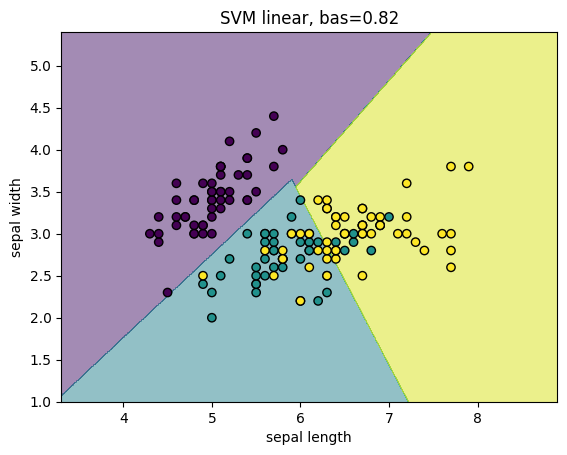

In [61]:
visualize_method(SVC(kernel='linear').fit(X, y), X, y, 'SVM linear')

**И SVM (Квадратичное ядро):**

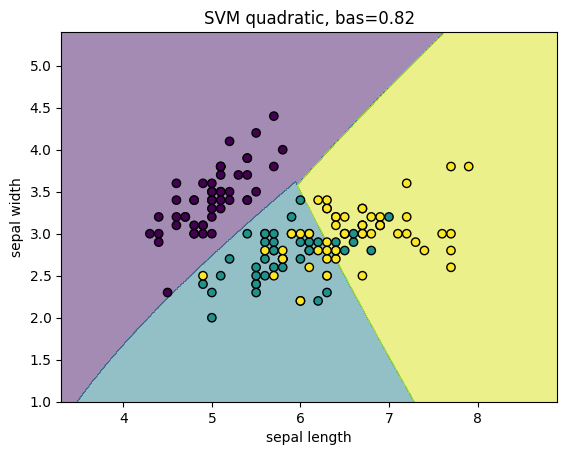

In [62]:
visualize_method(SVC(kernel='poly', degree=2).fit(X, y), X, y, 'SVM quadratic')

**Вывод:** Все классификаторы хорошо отделяют класс setosa от остальных, в то время как оставшиеся классы немного "смешаны" в терминах sepal length - sepal width. Можно сделать вывод (учитывая последний рисунок из задания 1), что эти переменные не особо подходят для раздиления versicolor и virginica. Так же можно заметить: линейный и квадратичный дискриминант справились чуть хуже других методов.

##***Задание 3***

##Оставляем наименее различимые классы: versicolor и virginica

---



In [93]:
df_without_setosa=named_iris_df[named_iris_df['target'] != 'setosa'].reset_index(drop=True)
df_without_setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


##Строим линейный дискриминант по всем переменным

---

In [96]:
classifier = LinearDiscriminantAnalysis().fit(df_without_setosa.drop(columns=['target']), df_without_setosa.target)
predicts = classifier.predict(df_without_setosa.drop(columns=['target']))

##Получаем true positive и false positive точки для обоих классов

---



In [97]:
versicolor_right=df_without_setosa[(df_without_setosa['target']==predicts) & (df_without_setosa['target']=='versicolor')]
versicolor_wrong=right=df_without_setosa[(df_without_setosa['target']!=predicts) & (df_without_setosa['target']=='virginica')]
virginica_right=df_without_setosa[(df_without_setosa['target']==predicts) & (df_without_setosa['target']=='virginica')]
virginica_wrong=right=df_without_setosa[(df_without_setosa['target']!=predicts) & (df_without_setosa['target']=='versicolor')]

##Снова рисуем

---



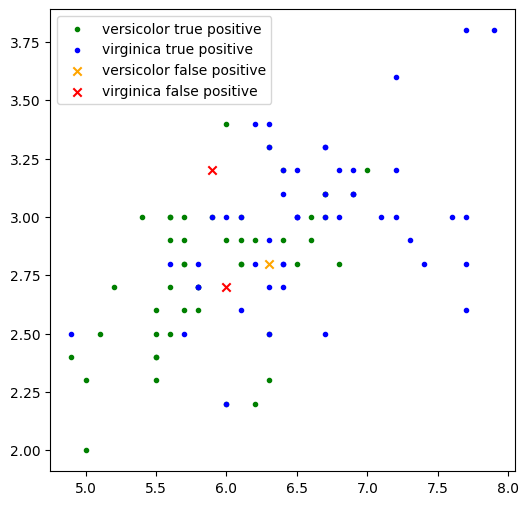

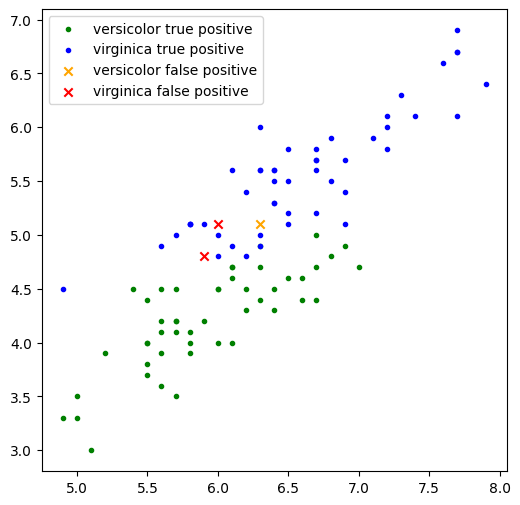

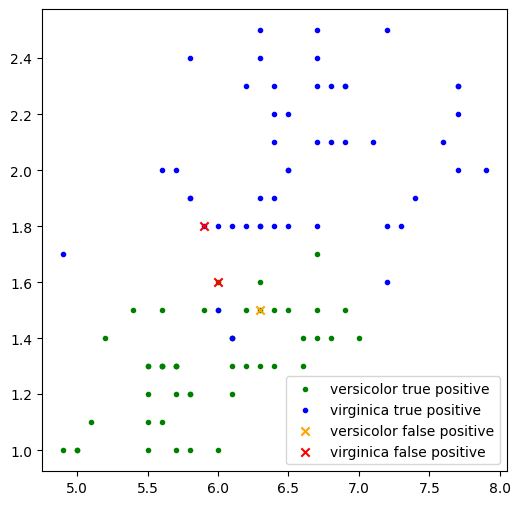

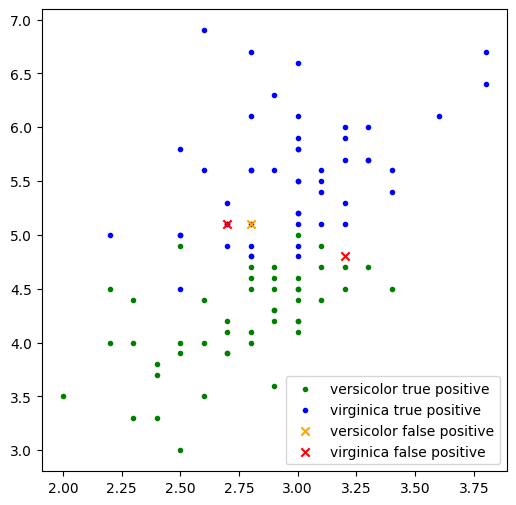

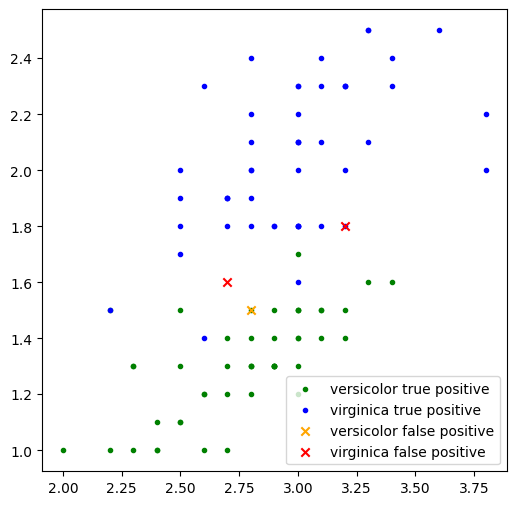

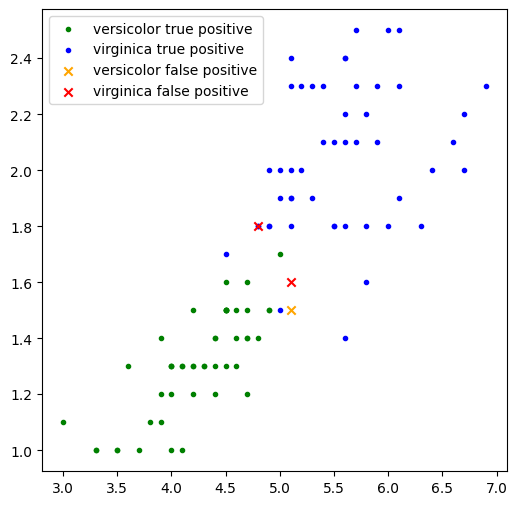

In [112]:
cols = df_without_setosa.columns
for i in range(4):
    for j in range(i+1, 4):
        plt.figure(figsize=(6,6))
        plt.scatter(versicolor_right[cols[i]], versicolor_right[cols[j]], c='green', marker='.', label='versicolor true positive')
        plt.scatter(virginica_right[cols[i]], virginica_right[cols[j]], c='blue', marker='.', label='virginica true positive')
        plt.scatter(versicolor_wrong[cols[i]], versicolor_wrong[cols[j]], c='orange', marker='x', label='versicolor false positive')
        plt.scatter(virginica_wrong[cols[i]], virginica_wrong[cols[j]], c='red', marker='x', label='virginica false positive')
        plt.legend()

##***Задание 4***

##Для начала напишем вспомогательные функции

---



In [253]:
def calculate_Q(X, A, M):
  arr = np.array([(x - M).T.dot(np.linalg.inv(A)).dot(x - M) for x in X])
  return arr

In [254]:
def give_curve_range(X, first_attr_df, second_attr_df):

    #find cov matrices for both classes
    L = np.cov(first_attr_df.to_numpy().T)
    S = np.cov(second_attr_df.to_numpy().T)

    #find expected value for both classes
    n = first_attr_df.to_numpy().mean(axis = 0)
    m = second_attr_df.to_numpy().mean(axis = 0)

    #get first_attr_Q and second_attr_Q
    first_attr_Q = calculate_Q(X, S, m)
    second_attr_Q = calculate_Q(X, L, n)

    #evaluate curve range
    val = (second_attr_Q - first_attr_Q) / 2
    val += 0.5 * np.log(np.linalg.det(L) / np.linalg.det(S))
    val += np.log(len(first_attr_df.index) / len(second_attr_df.index))

    return val

##Теперь можем порисовать

---



Text(0.5, 1.0, 'Sklearn quadratic discriminant')

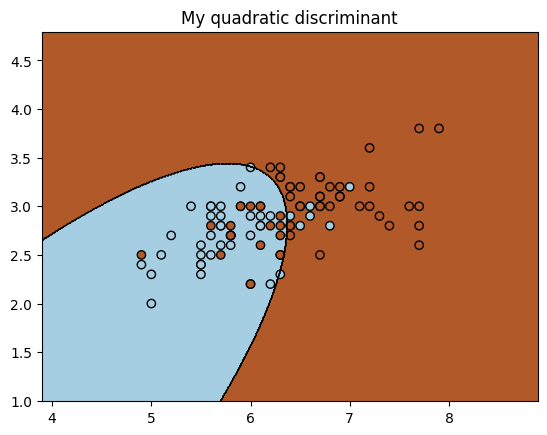

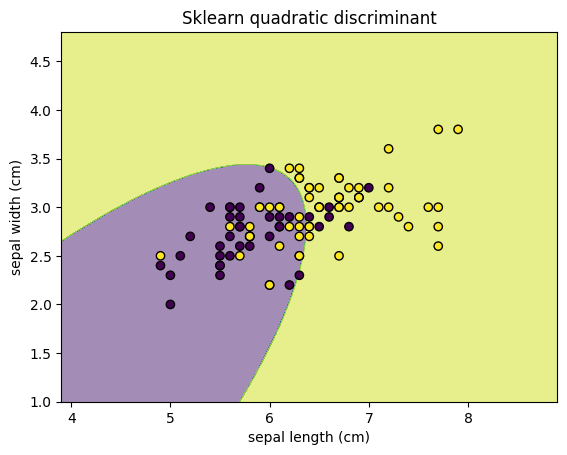

In [284]:
#devide data frame into two data frames for both classes
two_attr_df=df_without_setosa.drop(columns=['petal length (cm)',	'petal width (cm)'])
first_attr_df=two_attr_df[two_attr_df['target'] == 'versicolor'].drop(columns=['target'])
second_attr_df=two_attr_df[two_attr_df['target'] == 'virginica'].drop(columns=['target'])

#convert attributes and target to numpy arrays
X = two_attr_df.drop(columns=['target']).to_numpy()
y = two_attr_df.target.to_numpy()

#set border values for plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#prepare grid for calculation
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#get curve range on the grid
z = give_curve_range(np.c_[xx.ravel(), yy.ravel()], first_attr_df, second_attr_df)

#now we can draw the curve
z = np.sign(z)
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)
plt.contour(xx, yy, z, colors = 'black', linewidths = 0.5)

#draw all the remaining figure
plt.scatter(X[:, 0], X[:, 1], c=np.array([list(y).index(x) for x in y]), edgecolors='k', cmap=plt.cm.Paired)
plt.title('My quadratic discriminant')

#draw solution by sklearn quadratic discriminant
clf = QuadraticDiscriminantAnalysis().fit(two_attr_df.drop(columns=['target']), two_attr_df.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, two_attr_df.drop(columns=['target']), response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(two_attr_df.drop(columns=['target'])['sepal length (cm)'], two_attr_df.drop(columns=['target'])['sepal width (cm)'], c=np.array([list(y).index(x) for x in y]), edgecolors='k')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sklearn quadratic discriminant')



**Вывод:** у меня получилось очень даже похоже.